In [1]:
%matplotlib inline

import json, glob, sys, os, gzip
from IPython.display import HTML
import ipywidgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ctau is in meters
df_hzd_theory = pd.read_csv("https://raw.githubusercontent.com/aminnj/scouting/master/theory/hzd/hzd.csv")
df_hzd_theory = df_hzd_theory[df_hzd_theory["mass"] % 100 == 0]
df_hzd_theory["mass"] /= 1e3
df_hzd_theory = df_hzd_theory.set_index("mass")
# ctau is now in mm
df_hzd_theory[df_hzd_theory.columns[df_hzd_theory.columns.str.contains("ctau_")]] *= 1e3


def get_eps(mass, ctau):
    """
    Mass in GeV, ctau in mm.
    Returns epsilon.
    """
    row = df_hzd_theory.iloc[np.abs(df_hzd_theory.index - mass).argmin()]
    k = row["ctau_for_eps10em2"]
    eps = 1e-2*(k/ctau)**0.5
    return eps

In [3]:
get_eps(0.3, 133.723117) # should be 1-e6, yep

9.999999989101858e-07

Text(0, 0.5, 'epsilon')

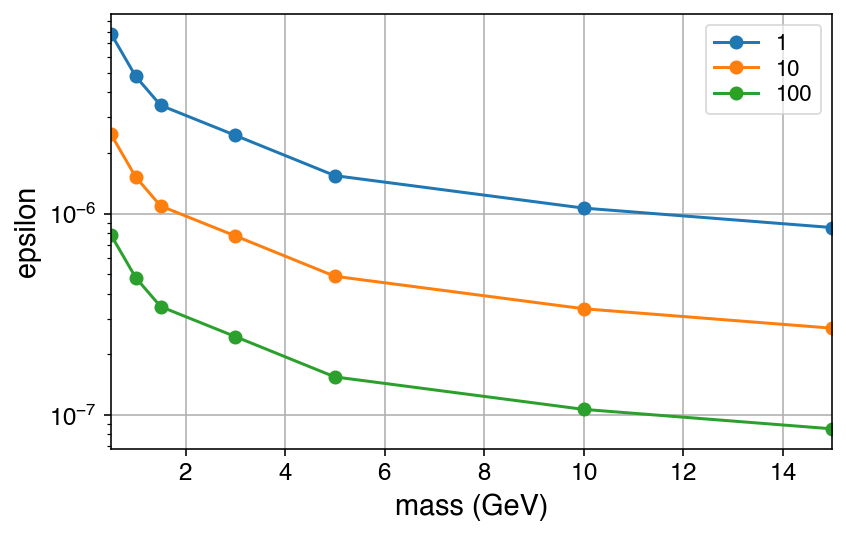

In [4]:
data = []
for mass in [0.5, 1., 1.5, 3.0, 5.0, 10., 15.]:
    for ctau in [1, 10, 100]:
        eps = get_eps(mass, ctau)
        data.append(dict(eps=eps, mass=mass, ctau=ctau))
df = pd.DataFrame(data)
df.set_index("mass").groupby("ctau")["eps"].plot(logy=True, marker="o", grid=True, legend=True)
ax = plt.gca()
ax.set_xlabel("mass (GeV)")
ax.set_ylabel("epsilon")